In [2]:
import torch
import os
import scipy.io.wavfile
import matplotlib.pyplot as plt
from kymatio import Scattering1D
from kymatio.datasets import fetch_fsdd

In [3]:
info_dataset = fetch_fsdd(verbose=True)

file_path = os.path.join(info_dataset['path_dataset'],
                        sorted(info_dataset['files'])[0])
_, x = scipy.io.wavfile.read(file_path)

Cloning git repository at  https://github.com/Jakobovski/free-spoken-digit-dataset.git


In [4]:
x = torch.from_numpy(x).float()
x /= x.abs().max()
x = x.view(1, -1)

In [27]:
T = x.shape[-1]
J = 6
Q = 16

In [28]:
scattering = Scattering1D(J, T, Q)
Sx = scattering.forward(x)
meta = Scattering1D.compute_meta_scattering(J, Q)
order0 = (meta['order'] == 0)
order1 = (meta['order'] == 1)
order2 = (meta['order'] == 2)

Text(0.5,1,'Original signal')

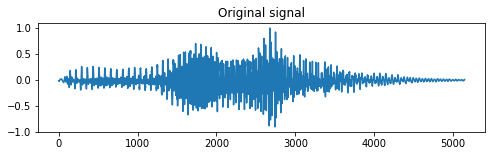

In [29]:
plt.figure(figsize=(8, 2))
plt.plot(x[0,:].numpy())
plt.title('Original signal')

In [38]:
Sx.shape, x.shape

(torch.Size([1, 222, 81]), torch.Size([1, 5148]))

In [43]:
sum(order0), sum(order1), sum(order2)

(tensor(1, dtype=torch.uint8),
 tensor(63, dtype=torch.uint8),
 tensor(158, dtype=torch.uint8))